In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, AvgPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

In [2]:
#导入手写数字集
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
x_train, x_test = x_train/255.0, x_test/255.0

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

devices=tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(devices[0],True)

In [5]:
# 创建LeNet
# class LeNet(Model):
#     def __init__(self):
#         super(LeNet, self).__init__()
#         #两层卷积
#         self.c1 = Conv2D(filters=6, kernel_size=(
#             5, 5), padding="same", activation="relu")
#         self.p1 = AvgPool2D(pool_size=(2, 2), strides=2)
#         #self.d1=Dropout(0.2)
#         self.c2 = Conv2D(filters=16, kernel_size=(5, 5), activation="relu")
#         self.p2 = AvgPool2D(pool_size=(2, 2), strides=2)
#         #self.d2=Dropout(0.2)
#         #三层全连接
#         self.flatten = Flatten()
#         self.f1 = Dense(120, activation="relu")
#         self.f2 = Dense(84, activation="relu")
#         self.f3 = Dense(10, activation="softmax")

#     def call(self, input_shape):

#         x = self.c1(input_shape)
#         x = self.p1(x)
#         #x=self.d1(x)
#         x = self.c2(x)
#         x = self.p2(x)
#         #x=self.d2(x)
#         x = self.flatten(x)
#         x = self.f1(x)
#         x = self.f2(x)
#         y = self.f3(x)
#         return y

model = tf.keras.models.Sequential(
    [Conv2D(filters=6, kernel_size=(5, 5), padding="same", activation="relu"),
     AvgPool2D(pool_size=(2, 2), strides=2),
     Conv2D(filters=16, kernel_size=(5, 5), activation="relu"),
     AvgPool2D(pool_size=(2, 2), strides=2),

     #Conv2D(filters=120, kernel_size=(5, 5), activation="relu"),

     Flatten(),
     Dense(120, activation="relu"),
     Dense(84, activation="relu"),
     Dense(10, activation="softmax")]
)


In [6]:
#model = LeNet()

model.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"]
              )


In [7]:

model_result = model.fit(x_train, y_train, batch_size=8, epochs=5,
                           validation_data=(x_test, y_test), validation_freq=1)


Epoch 1/5
7500/7500 [==============================] - 22s 2ms/step - loss: 0.3114 - accuracy: 0.9040 - val_loss: 0.1060 - val_accuracy: 0.9674
Epoch 2/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.0976 - accuracy: 0.9702 - val_loss: 0.0684 - val_accuracy: 0.9783
Epoch 3/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.0695 - accuracy: 0.9779 - val_loss: 0.0526 - val_accuracy: 0.9819
Epoch 4/5
7500/7500 [==============================] - 18s 2ms/step - loss: 0.0552 - accuracy: 0.9827 - val_loss: 0.0480 - val_accuracy: 0.9858
Epoch 5/5
7500/7500 [==============================] - 19s 2ms/step - loss: 0.0452 - accuracy: 0.9854 - val_loss: 0.0477 - val_accuracy: 0.9843


In [8]:
model.save(".//models//LeNet.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (8, 28, 28, 6)            156       
_________________________________________________________________
average_pooling2d (AveragePo (8, 14, 14, 6)            0         
_________________________________________________________________
conv2d_1 (Conv2D)            (8, 10, 10, 16)           2416      
_________________________________________________________________
average_pooling2d_1 (Average (8, 5, 5, 16)             0         
_________________________________________________________________
flatten (Flatten)            (8, 400)                  0         
_________________________________________________________________
dense (Dense)                (8, 120)                  48120     
_________________________________________________________________
dense_1 (Dense)              (8, 84)                   1

In [9]:
#设置黑体为默认字体
plt.rcParams["font.sans-serif"] = "SimHei"
#设置正常显示负号
plt.rcParams["axes.unicode_minus"] = False

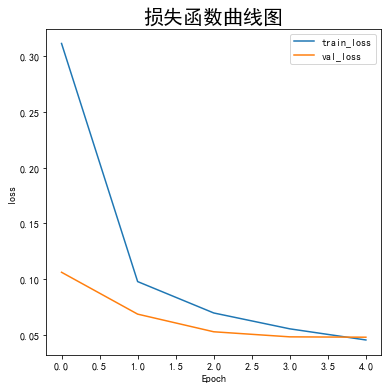

In [10]:
#训练和测试时的损失函数
train_loss=model_result.history["loss"]
val_loss=model_result.history["val_loss"]
plt.figure(figsize=(6,6))
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.plot(train_loss,label="train_loss")
plt.plot(val_loss,label="val_loss")
plt.title("损失函数曲线图",fontsize=20)
plt.legend()
plt.show()

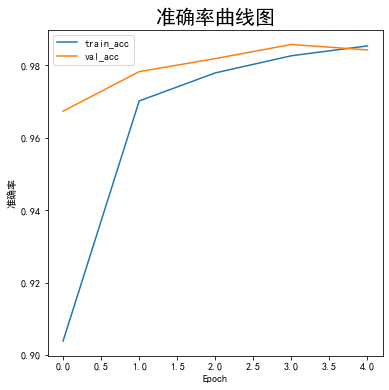

In [11]:
#训练和测试时的准确率
train_acc=model_result.history["accuracy"]
val_acc=model_result.history["val_accuracy"]
plt.figure(figsize=(6,6))
plt.xlabel("Epoch")
plt.ylabel("准确率")
plt.plot(train_acc,label="train_acc")
plt.plot(val_acc,label="val_acc")
plt.title("准确率曲线图",fontsize=20)
plt.legend()
plt.show()

In [12]:
#识别判断
new_image = x_test[100]
print(y_test[100])
new_image = tf.keras.preprocessing.image.img_to_array(new_image)
print(new_image.shape)
new_image = np.expand_dims(new_image, axis = 0)
new_image.shape

6
(28, 28, 1)


(1, 28, 28, 1)

In [13]:
pred=model.predict(new_image)
pred=np.argmax(pred)
pred

6